# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction, which is widely used in data analysis and machine learning. PCA transforms the data into a new coordinate system such that the greatest variances by any projection of the data come to lie on the first coordinates (called principal components), the second greatest variances on the second coordinates, and so on.

## Why Use PCA?

- **Reduce Dimensionality:** Simplifies the data by reducing the number of variables.
- **Remove Noise:** Helps in eliminating noise and retaining important information.
- **Visualize Data:** Allows for visualization of high-dimensional data in 2D or 3D.
- **Improve Performance:** Reduces computational cost and improves the performance of machine learning models.

## When to Use PCA?

- When you have a large number of variables.
- When variables are correlated.
- When you need to visualize high-dimensional data.
- When you want to remove noise and redundancy from the data.


## Mathematical Foundations of PCA

PCA works by identifying the axes (principal components) that maximize the variance in the data.

### Steps Involved in PCA:

1. **Standardize the Data:** Subtract the mean and divide by the standard deviation for each feature.
2. **Compute the Covariance Matrix:** Calculate the covariance matrix of the standardized data.
3. **Calculate Eigenvalues and Eigenvectors:** Compute the eigenvalues and eigenvectors of the covariance matrix.
4. **Sort Eigenvalues and Eigenvectors:** Sort the eigenvalues and their corresponding eigenvectors in descending order.
5. **Select Principal Components:** Choose the top k eigenvectors that correspond to the k largest eigenvalues.
6. **Transform the Data:** Project the original data onto the selected principal components.

### Covariance Matrix

The covariance matrix is a measure of how much each of the dimensions varies from the mean with respect to each other.

$$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$

### Eigenvalues and Eigenvectors

An eigenvector of a square matrix $A$ is a non-zero vector $v$ such that multiplying $A$ by $v$ simply scales $ v$ by a scalar factor $\lambda$:

$$A \cdot v = \lambda \cdot v$$

Where $\lambda$ is the eigenvalue corresponding to the eigenvector $v$.


## Additional Concepts

### Scree Plot

A scree plot is a graphical representation of the eigenvalues associated with each principal component. It helps in determining the number of principal components to retain.

### Cumulative Explained Variance

The cumulative explained variance shows the total variance explained by the first k principal components. It helps in deciding how many components are needed to capture a certain percentage of the total variance.

### Biplot

A biplot is a graphical display that plots both the principal component scores and the principal component loadings. It provides insights into the relationships between variables and observations in the new principal component space.


## Implementation of PCA with Examples

Let's implement PCA using Python's `numpy` and `scikit-learn` libraries.

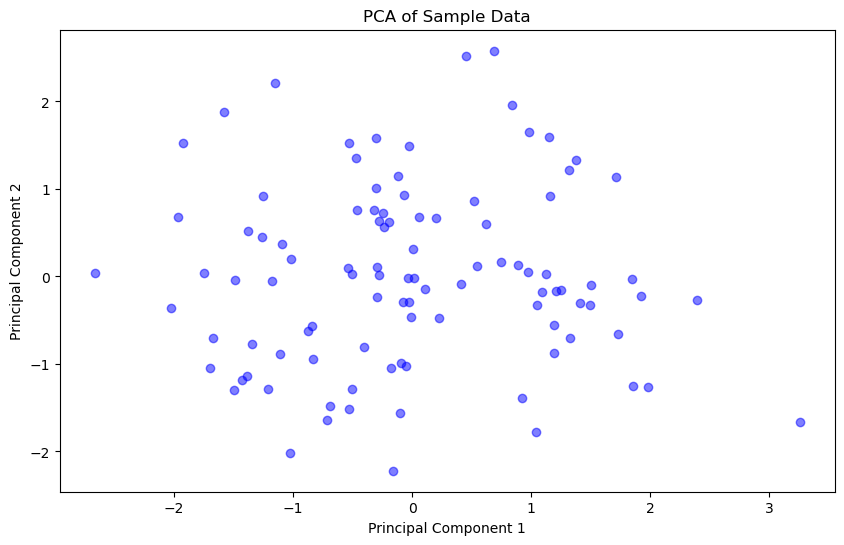

Explained Variance Ratio: [0.25707979 0.21272367]


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generating a sample dataset
np.random.seed(42)
data = np.random.randn(100, 5)  # 100 samples with 5 features

# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Creating a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], color='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


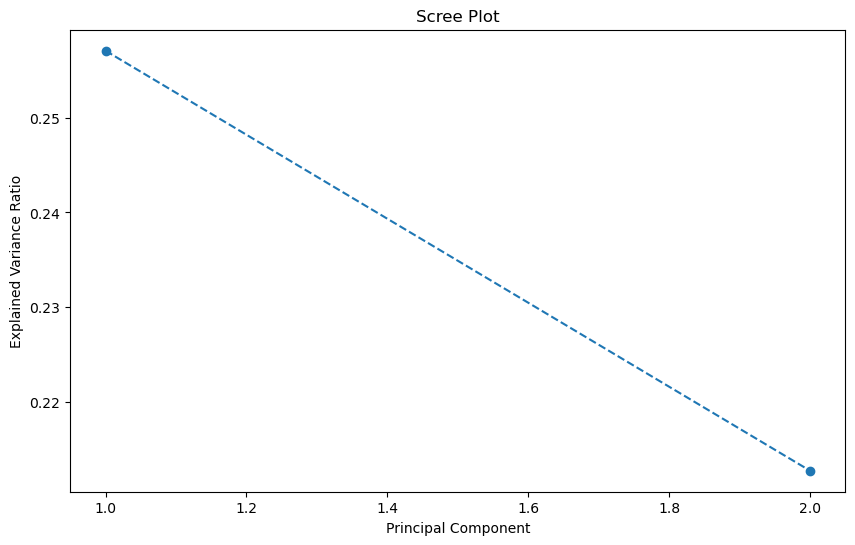

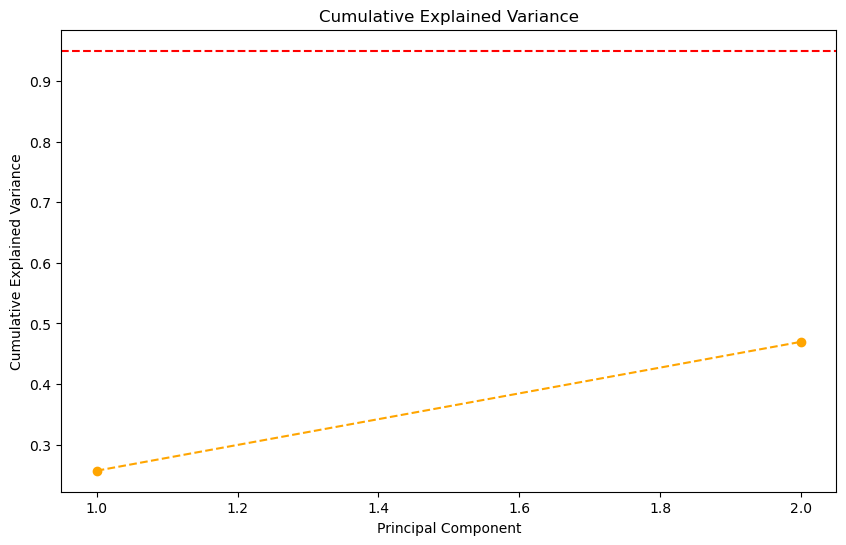

In [3]:
# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Plotting cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


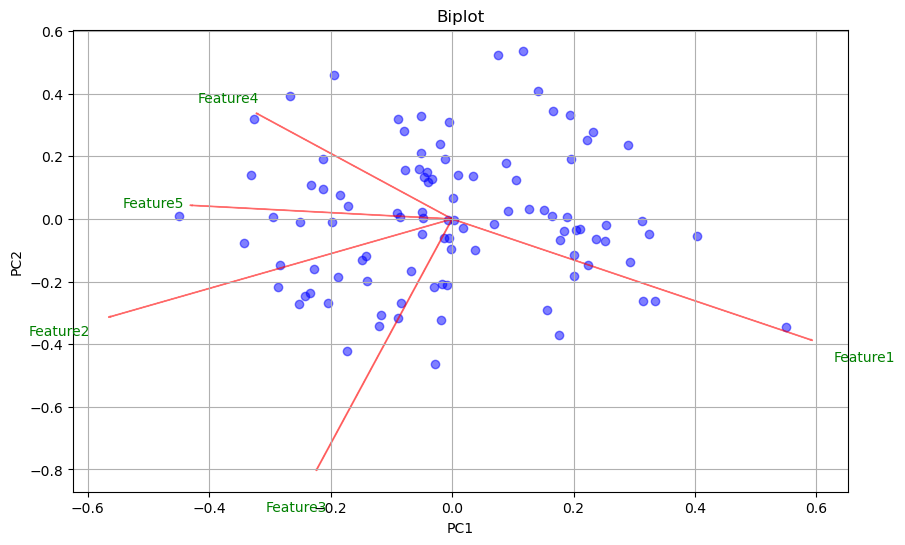

In [4]:
# Function to draw a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Plotting the biplot
plt.figure(figsize=(10, 6))
biplot(principal_components, np.transpose(pca.components_), labels=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
plt.title('Biplot')
plt.show()


## Interpreting the Results

- The scatter plot shows the data projected onto the first two principal components.
- The explained variance ratio tells us how much variance is captured by each principal component. In this example, the first two components capture most of the variance in the data.
- The scree plot helps us determine the number of principal components to retain.
- The cumulative explained variance plot helps us understand how many components are needed to capture a certain percentage of the total variance.
- The biplot provides insights into the relationships between variables and observations in the new principal component space.
